##  _*SVM with a classical RBF kernel*_

We have shown here a QSVM_Kernel notebook with the classification problem solved using a quantum algorithm. By comparison this shows the problem solved classically.

**This notebook shows the SVM implementation based on the classical RBF kernel.**

In [1]:
from datasets import *
from qiskit_aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit_aqua.input import SVMInput
from qiskit_aqua import run_algorithm

First we prepare the dataset, which is used for training, testing and the finally prediction.

*Note: You can easily switch to a different dataset, such as the Breast Cancer dataset, by replacing 'ad_hoc_data' to 'Breast_cancer' below.*

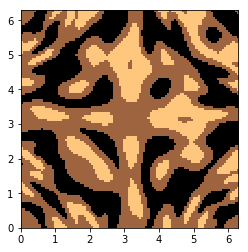

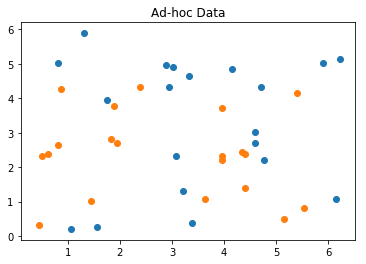

In [3]:
feature_dim = 2 # dimension of each data point
training_dataset_size = 20
testing_dataset_size = 10

sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_dataset_size, 
                                                                     test_size=testing_dataset_size, 
                                                                     n=feature_dim, gap=0.3, PLOT_DATA=True)

datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

With the dataset ready we initialize the necessary inputs for the algorithm:
- the input dictionary (params) 
- the input object containing the dataset info (algo_input).

In [3]:
params = {
    'problem': {'name': 'svm_classification'},
    'algorithm': {
        'name': 'SVM'
    }
}

algo_input = SVMInput(training_input, test_input, datapoints[0])

With everything setup, we can now run the algorithm.

For the testing, the result includes the details and the success ratio.

For the prediction, the result includes the predicted labels.  

kernel matrix during the training:


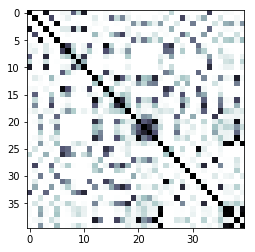

testing success ratio:  0.6
predicted classes: ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'B']


In [5]:
result = run_algorithm(params, algo_input)
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

print("testing success ratio: ", result['testing_accuracy'])
print("predicted classes:", result['predicted_classes'])

### The breast cancer dataset
Now we run our algorithm with the real-world dataset: the breast cancer dataset

In [1]:
sample_Total, training_input, test_input, class_labels = Breast_cancer(training_size=20, test_size=10, n=2, PLOT_DATA=True)
# n =2 is the dimension of each data point

datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
label_to_class

NameError: name 'Breast_cancer' is not defined

kernel matrix during the training:


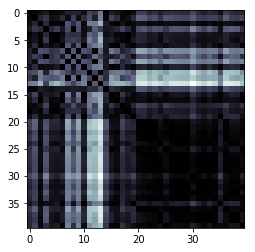

testing success ratio:  0.85
ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
predicted:    ['A', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


In [7]:
algo_input = SVMInput(training_input, test_input, datapoints[0])
result = run_algorithm(params, algo_input)
# print(result)
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

print("testing success ratio: ", result['testing_accuracy'])

print("ground truth: {}".format(map_label_to_class_name(datapoints[1], label_to_class)))
print("predicted:    {}".format(result['predicted_classes']))